In [206]:
#Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import re

#Create a function using regex to search for a pattern in a given string to use inside of the main data analysis function
def fileguard(file):  
    csv = re.compile(r'.*\.csv') #Defines the pattern to search for
    file = csv.search(file) #Searches for the pattern given the input 
    return bool(file)


def dataanalysis(filename='', stat='', key=''):    
    filename = str(input('What .csv file would you like to analyze?'))
    #Asks what csv file you would like to analyze and takes the csv file and reads it, and asks the user for inputs for what they want to find and for what category. 
    assert fileguard(filename) == True, "This file type cannot be used, please use a .csv file type" #Checks if the input for the file is a .csv file, if not it will propse an assertion error saying to input a .csv file
    data = pd.read_csv(filename)
    stat = str(input('What statistic do you want to find from the data? (i.e. Max, Min, Avg, Std) '))
    assert stat.upper() == 'MAX' or stat.upper() == 'MIN' or stat.upper() == 'AVG' or stat.upper() == 'STD', 'Please choose one of the example statistical analysis' #Checks if the input for the type of statistic is one of the options avaliable, if not will propose an assertion error
    key = str(input('What do you want to find the {} of? (i.e Slow approach, Vigilance, Foraging)'.format(stat)))
    assert key == 'Foraging' or key == 'Vigilance' or key == 'Slow approach', "Please choose from one of the catagories shown above" #Checks if the input for the catagory is one of the columns in the dataset, if not propse an assertion error.  
    #Seperates the data based on treatment type
    catdata = data.loc[data['TREATMENT'] == 'Cat']
    controldata = data.loc[data['TREATMENT'] == 'Control']
    #If statements to check what statistic the user wants to find out
    #Prints out the the behavior score depending on the statistics and rounds it to 3 sigfig
    #Plots behavior score for each subject based on their treatment type using matplotlib
    if stat.upper() == 'MAX': #Max function
        print('This is the maximum behavior score for bettongs exposed to cats:',round(catdata[key].max(), 3))
        print('This is the maximum behavior score for bettongs not exposed to cats:',round(controldata[key].max(), 3))
        plt.scatter(range(len(catdata)),catdata[key], label='Cat Exposed')
        plt.scatter(range(len(controldata)),controldata[key], label='Control')
        plt.legend(loc='upper right') #Creates a legend on the top right with two labels, 'Cat Exposed' and 'Control'
        plt.ylabel('Behavior Score') #Label the axis of the graph 
        plt.xlabel('Subject #')
    elif stat.upper() == 'MIN': #Min function
        print('This is the minimum behavior score for bettongs exposed to cats:',round(catdata[key].min(), 3))
        print('This is the minimum behavior score for bettongs not exposed to cats:',round(controldata[key].min(), 3))
        plt.scatter(range(len(catdata)),catdata[key], label='Cat Exposed')
        plt.scatter(range(len(controldata)),controldata[key], label='Control')
        plt.legend(loc='upper right')
        plt.ylabel('Behavior Score')
        plt.xlabel('Subject #')
    elif stat.upper() == 'AVG': #Average function
        print('This is the average behavior score for bettongs exposed to cats:',round(catdata[key].mean(), 3))
        print('This is the average behavior score for bettongs not exposed to cats:',round(controldata[key].mean(), 3))
        plt.scatter(range(len(catdata)),catdata[key], label='Cat Exposed')
        plt.scatter(range(len(controldata)),controldata[key], label='Control')
        plt.legend(loc='upper right')
        plt.ylabel('Behavior Score')
        plt.xlabel('Subject #')
    elif stat.upper() == 'STD': #Standard deviation function
        print('This is the standard deviation for behavior score for bettongs exposed to cats:', round(catdata[key].std(), 3))
        print('This is the standard deviation for behavior scores for bettongs not exposed to cats:',round(controldata[key].std(), 3))
        plt.scatter(range(len(catdata)),catdata[key], label='Cat Exposed')
        plt.scatter(range(len(controldata)),controldata[key], label='Control')
        plt.legend(loc='upper right')
        plt.ylabel('Behavior Score')
        plt.xlabel('Subject #')

In [65]:
#Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from tabulate import tabulate
import re

def fileguard(file): #Create functino to search if correct file input
    csv = re.compile(r'.*\.csv') #Defines the pattern to search for
    file = csv.search(file) #Searches for the pattern given the input 
    return bool(file)

def tablemaker(x, catdata, controldata): #Create function to make a data table
    header = ['Stat', x] #Create header for data table
    catlist = [('Max', str(round(catdata[x].max(),3))), #Create list for data table consisting of statistical data, rounded to 3 decimal places, for 'Cat' treated trials
               ('Min', str(round(catdata[x].min(),3))),
               ('Avg', str(round(catdata[x].mean(),3))),
               ('Std', str(round(catdata[x].std(), 3)))]
    controllist = [('Max', str(round(controldata[x].max(),3))), #Create list for data table consisting of statistical data, rounded to 3 decimal places, for 'Control' treated trials
                  ('Min', str(round(controldata[x].min(),3))),
                  ('Avg', str(round(controldata[x].mean(),3))),
                  ('Std', str(round(controldata[x].std(), 3)))]
    print('')
    print('Data for bettongs exposed to cats') #Prints title for table
    print(tabulate(catlist, headers=header)) #Format header and list into table using tabulate, for 'Cat'
    print('')
    print('Data for bettongs not exposed to cats') #Prints title for table
    print(tabulate(controllist, headers=header)) #Format header and list into table using tabulate, for 'Control'

def dataanalysis(filename= '', x = ''): #Create function to analyze behavior score   
    filename = str(input('What .csv file would you like to analyze?')) #Takes input for .csv file
    assert fileguard(filename) == True, "This file type cannot be used, please use a .csv file type." #Checks if the input for the file is a .csv file using regex, if not it will propse an assertion error saying to input a .csv file
    data = pd.read_csv(filename) #Uses pandas to read .csv file
    catdata = data.loc[data['TREATMENT'] == 'Cat'] #Seperates data based on treatment type, 'Cat' and 'Control', and creates new data frame
    controldata = data.loc[data['TREATMENT'] == 'Control']
    if filename == 'Anti-predator.csv': #If statement to analyze different datasets
        x = str((input('Which behavior type would you like to analyze? (Foraging, Slow approach, Vigilance)')).lower()).capitalize() #Takes input for behavior type to analyze
        assert x == 'Foraging' or x == 'Vigilance' or x == 'Slow approach', "Please choose from one of the catagories shown above" #Checks if the input for the category is one of the columns in the dataset, if not, propose an assertion error.
        tablemaker(x, catdata, controldata) #Function to create table
        sea.set(font_scale=2) #Changes font size for graph
        plt.figure(figsize=(20,15)) #Changes graph size
        sea.set_style("whitegrid", {'axes.edgecolor': '.15', 'grid.color': '.15'}) #Sets style of graph
        sea.boxenplot(x = x, y = "TREATMENT", hue = "TIME", data = data) #Creates a boxen plot 
        sea.swarmplot(x = x, y = "TREATMENT", hue = "TIME", dodge = True, color = 'k', alpha = 0.5, size = 10, data = data) #Creates a swarm plot
        sea.despine() #Remove top and right axes spine
        plt.legend(title = "Time (Month)", loc = "center right", bbox_to_anchor = (1.3, .5), prop={'size': 30}) #Change legend title and adjust size and location
        plt.ylabel("Treatment", size = 30) #Add label to y-axis and change size
        plt.xlabel("{} Behavior Score".format(x), size = 30, labelpad = 20) #Add label to x-axis and change size
        plt.xlim(-.1,) #Define limit for x making it easier to see
    elif filename == 'FID.csv': 
        separator = str(input('What variable would you like to analyze? (Time or Sex)')).upper() #Takes variable to analyze
        assert separator == 'SEX' or separator == 'TIME', 'Please choose one of the given variables in the parentheses (Time or Sex).' #CChecks if the input for variable is one of the columns in the dataset, if not propose an assertion error.
        x = 'BACI FID' #Sets x as 'BACI FID' to use later
        tablemaker(x, catdata, controldata) #Function to create table
        plt.figure(figsize = (15,10)) #Changes graph size
        sea.set_style('whitegrid', {'axes.edgecolor': '.15', 'grid.color': '.15'}) #Set style of graph
        sea.boxenplot(x = x, y = 'TREATMENT', hue = separator, data=data) #Create boxen plot
        sea.swarmplot(x = x, y = "TREATMENT", hue = separator, dodge = True, color = 'k', alpha = 0.5, size = 10, data = data) #Create swarm plot
        sea.despine() #Remove top and right axes spine
        plt.legend(title = (separator.lower()).capitalize(), loc = 'center right', bbox_to_anchor = (1.2, .5)) #Change legend title and adjust location
        plt.xlabel('Flight Initiation Distance (FID)', labelpad = 20) #Add label to x-axis
        plt.ylabel('Treatment') #Add label to y-axis
    


What .csv file would you like to analyze?FID.csv
What variable would you like to analyze? (Time or Sex)Sex

Data for bettongs exposed to cats
Stat      BACI FID
------  ----------
Max         35
Min        -30
Avg          5.758
Std         18.942

Data for bettongs not exposed to cats
Stat      BACI FID
------  ----------
Max         27
Min        -35
Avg         -5.864
Std         16.525


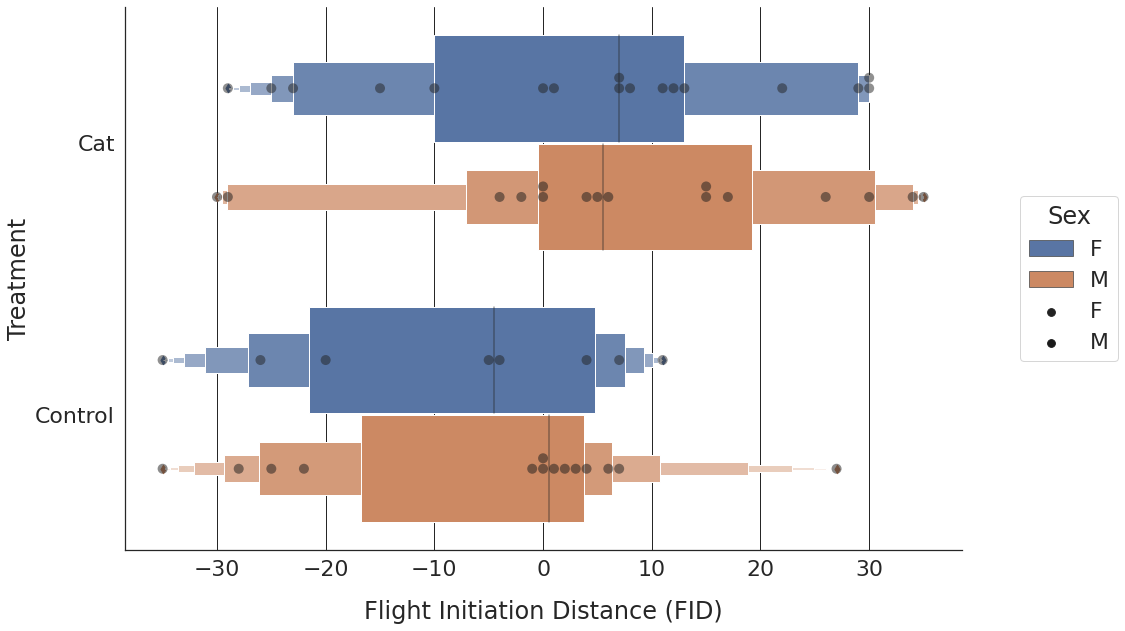

In [66]:
dataanalysis()